In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
db=pd.read_csv("Cost_of_Living_Index_2022.csv")

print(db.head())

   Rank      Country  Cost of Living Index  Rent Index  \
0     1  Afghanistan                 20.37        2.72   
1     2      Albania                 35.50        8.47   
2     3      Algeria                 26.87        4.59   
3     4    Argentina                 34.69        7.71   
4     5      Armenia                 33.89       11.61   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                           12.09            14.92                   12.41   
1                           22.83            29.32                   25.82   
2                           16.43            28.82                   14.48   
3                           22.04            28.17                   33.32   
4                           23.45            27.59                   30.55   

   Local Purchasing Power Index  
0                         23.04  
1                         30.19  
2                         24.63  
3                         30.72  
4           

Notice that according to the source of this dataset, each feature is defined as follows:
These indices are relative to New York City (NYC). Which means that for New York City, each index should be 100(%). If another city has, for example, rent index of 120, it means that on an average in that city rents are 20% more expensive than in New York City. If a city has rent index of 70, that means on average rent in that city is 30% less expensive than in New York City.

Cost of Living Index (Excl. Rent) is a relative indicator of consumer goods prices, including groceries, restaurants, transportation and utilities. Cost of Living Index does not include accommodation expenses such as rent or mortgage. If a city has a Cost of Living Index of 120, it means Numbeo has estimated it is 20% more expensive than New York (excluding rent).

Rent Index is an estimation of prices of renting apartments in the city compared to New York City. If Rent index is 80, Numbeo has estimated that price of rents in that city is on average 20% less than the price in New York.

Groceries Index is an estimation of grocery prices in the city compared to New York City. To calculate this section, Numbeo uses weights of items in the "Markets" section for each city.

Restaurants Index is a comparison of prices of meals and drinks in restaurants and bars compared to NYC.

Cost of Living Plus Rent Index is an estimation of consumer goods prices including rent comparing to New York City.

Local Purchasing Power shows relative purchasing power in buying goods and services in a given city for the average net salary in that city. If domestic purchasing power is 40, this means that the inhabitants of that city with an average salary can afford to buy on an average 60% less goods and services than New York City residents with an average salary.

In [3]:
print(db.isnull().sum())

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64


No null value in this database.

In [4]:
db_20=db.nsmallest(20, columns="Cost of Living Index")
print(db_20)

     Rank                      Country  Cost of Living Index  Rent Index  \
92     93                     Pakistan                 19.92        3.91   
0       1                  Afghanistan                 20.37        2.72   
52     53                        India                 24.43        5.30   
26     27                     Colombia                 26.72        8.18   
2       3                      Algeria                 26.87        4.59   
66     67  Kosovo (Disputed Territory)                 27.05        8.04   
133   134                   Uzbekistan                 27.31        9.29   
125   126                      Tunisia                 27.87        5.32   
84     85                        Nepal                 28.29        3.96   
126   127                       Turkey                 28.31        6.63   
64     65                   Kazakhstan                 28.68        9.44   
120   121                        Syria                 28.75        5.17   
35     36   

In [13]:
print(db.describe())

             Rank  Cost of Living Index  Rent Index  \
count  139.000000            139.000000  139.000000   
mean    70.000000             50.188633   19.291511   
std     40.269923             20.860222   15.317726   
min      1.000000             19.920000    2.720000   
25%     35.500000             34.715000    9.515000   
50%     70.000000             44.680000   13.930000   
75%    104.500000             62.580000   25.070000   
max    139.000000            146.040000   98.580000   

       Cost of Living Plus Rent Index  Groceries Index  \
count                      139.000000       139.000000   
mean                        35.705324        46.637842   
std                         17.542523        20.952229   
min                         12.090000        14.920000   
25%                         23.310000        31.200000   
50%                         31.260000        40.220000   
75%                         44.865000        56.590000   
max                        123.800000   

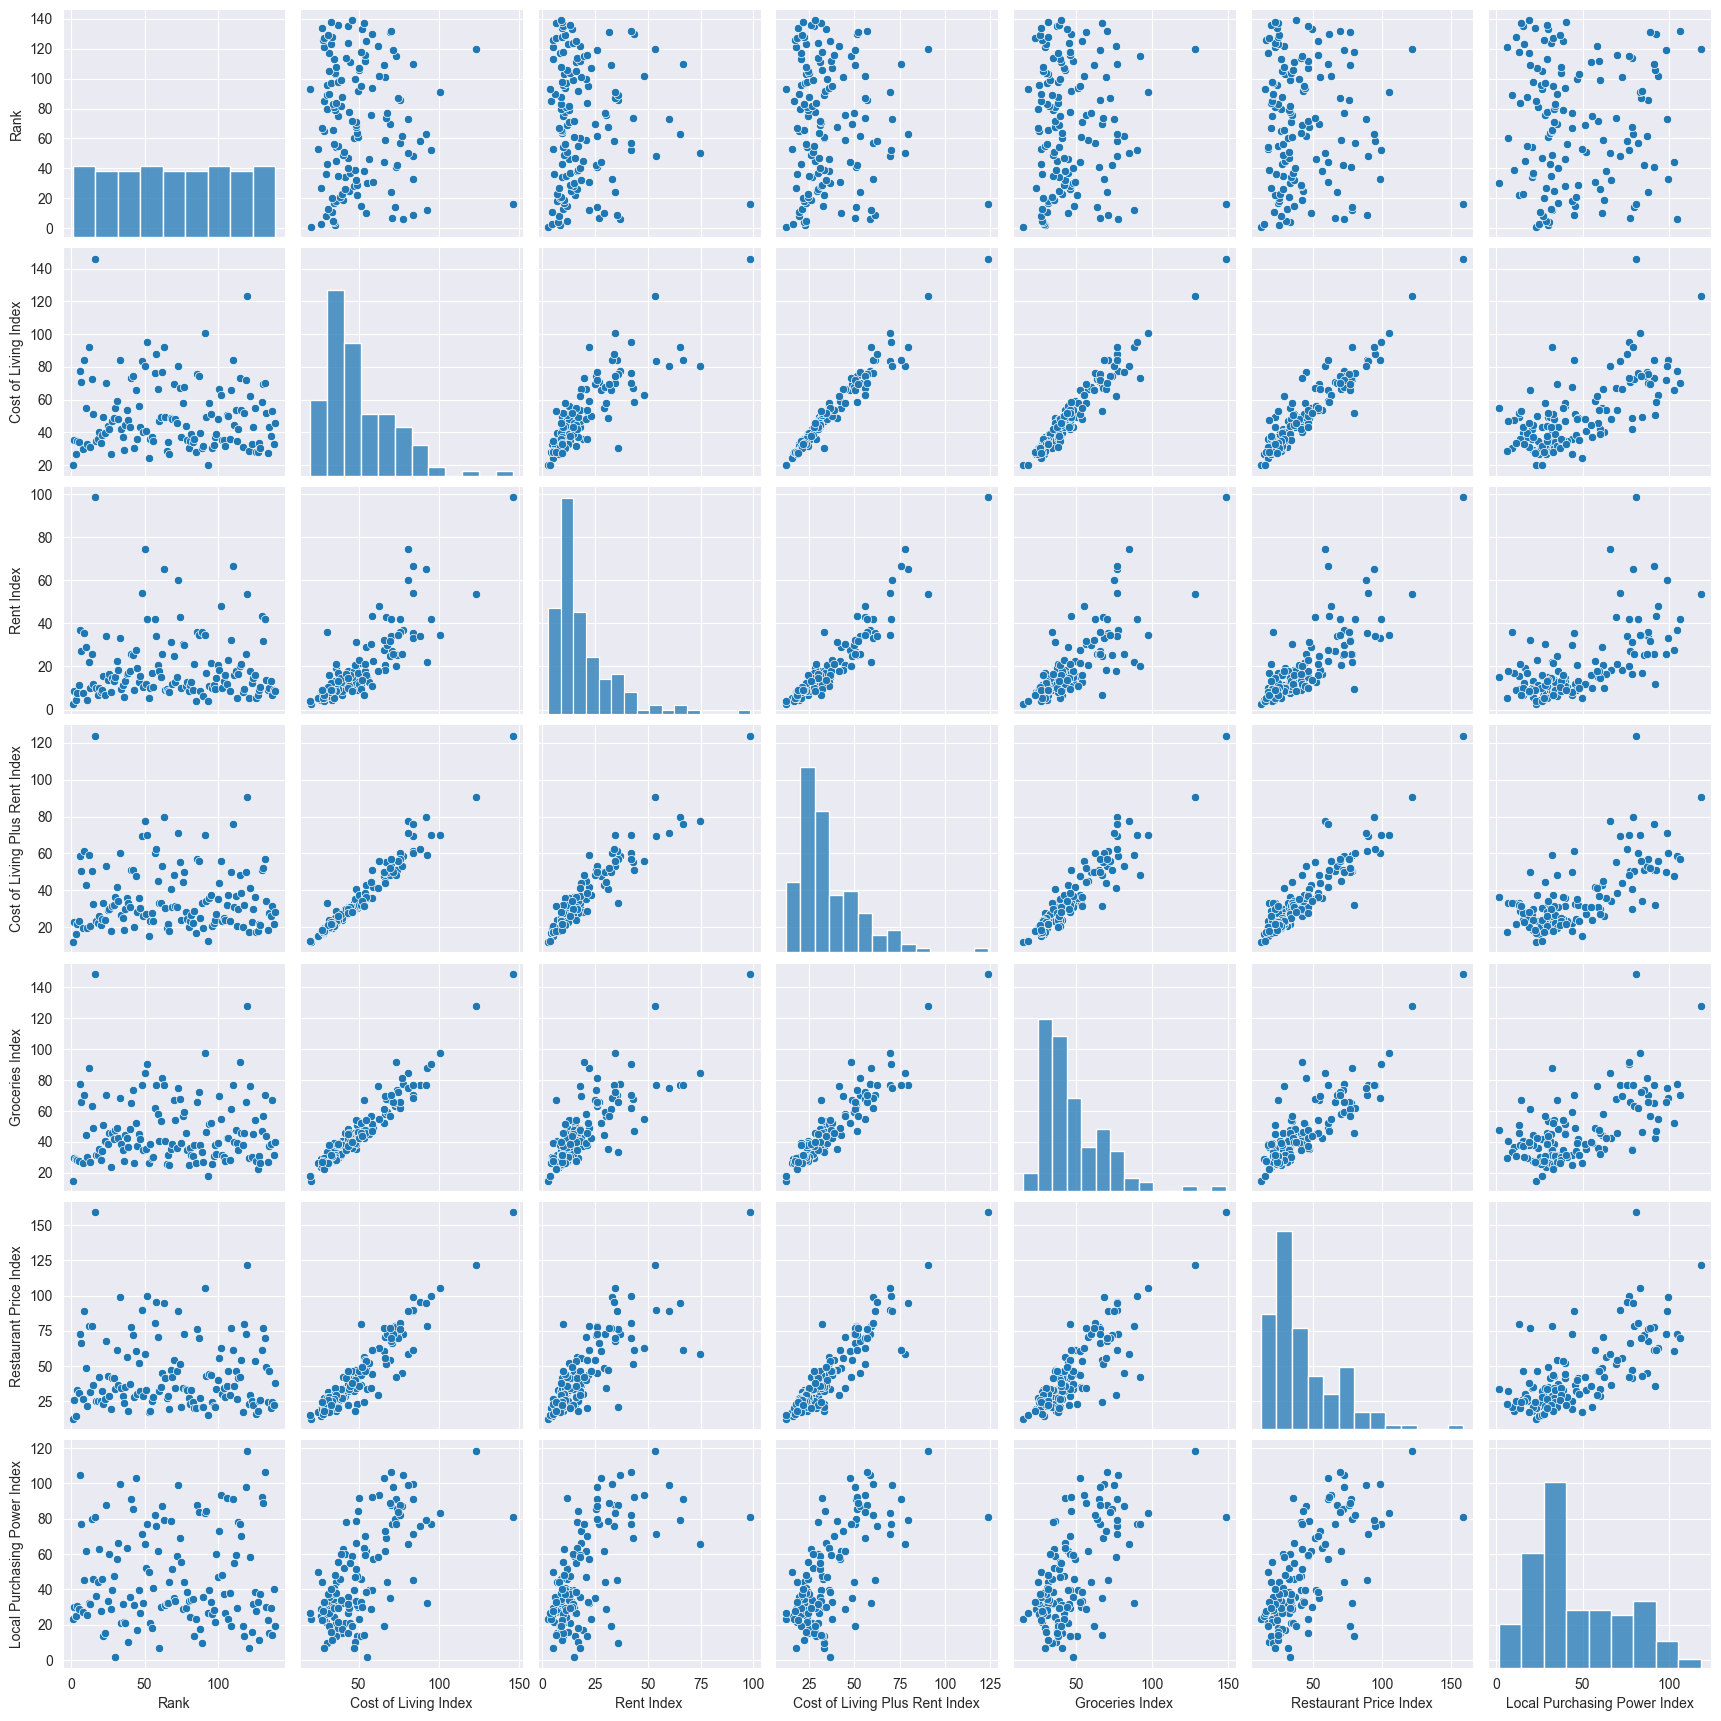

In [21]:
sns.pairplot(db)
plt.show()

From this pairplot, we can easily see that cost of living index is highly proportional to the Rent Index, Cost of Living Plus Rent Index, Groceries Index, and Restaurant Price Index, and also related to the Local Purchasing Power Index. 

Also, 

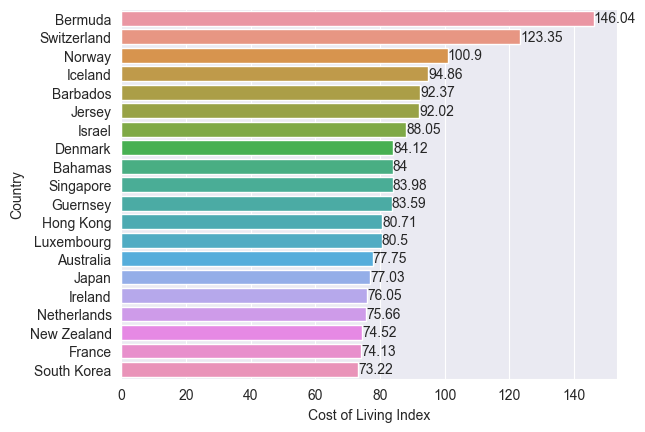

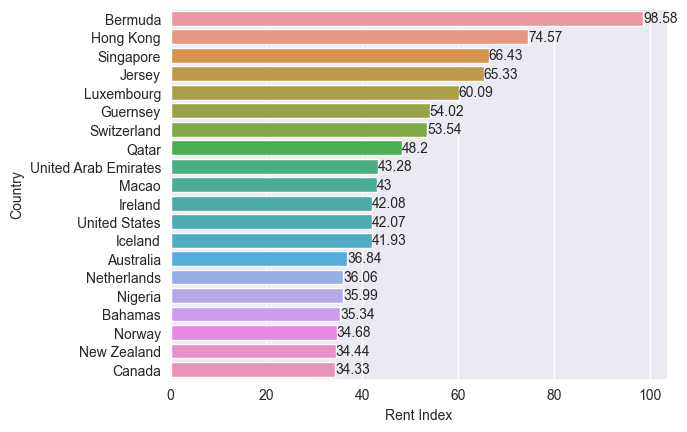

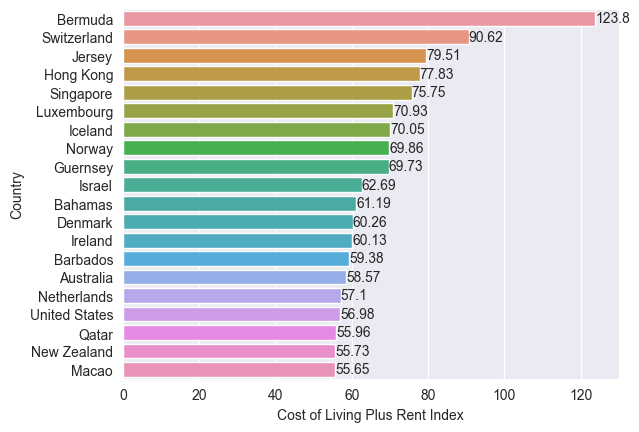

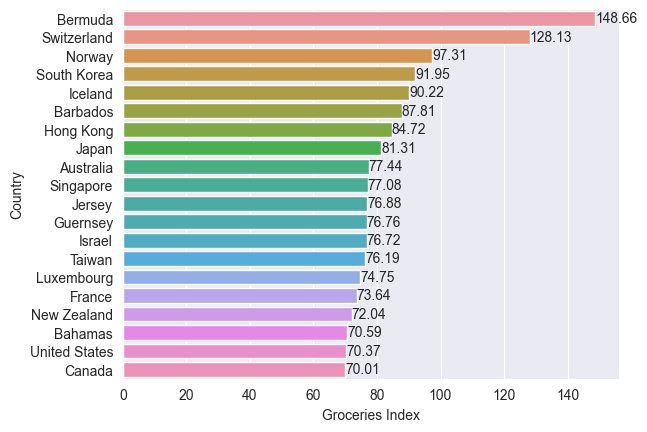

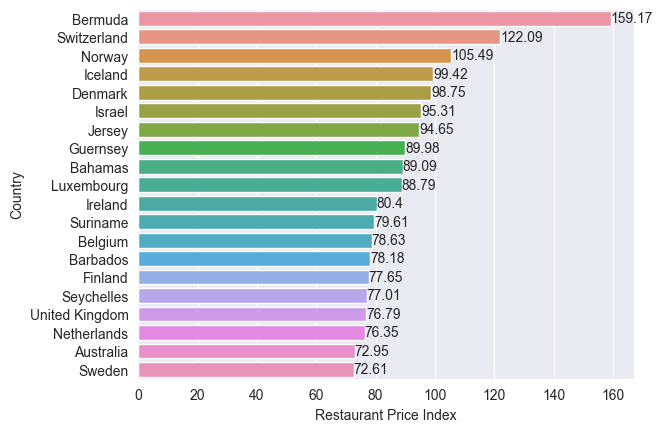

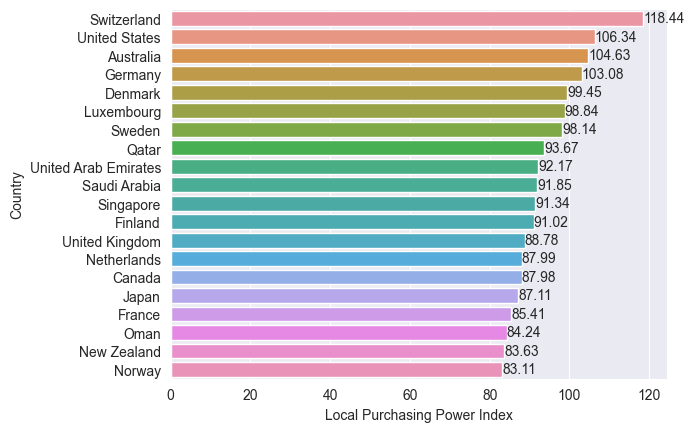

In [24]:
columns=['Cost of Living Index', 'Rent Index','Cost of Living Plus Rent Index', 'Groceries Index','Restaurant Price Index', 'Local Purchasing Power Index']
sns.set_style("darkgrid")
for column in columns:
    top20 = db.nlargest(20, column)
    ax=sns.barplot(x=db[column], y="Country", data=top20)
    ax.bar_label(ax.containers[0])
    plt.show()


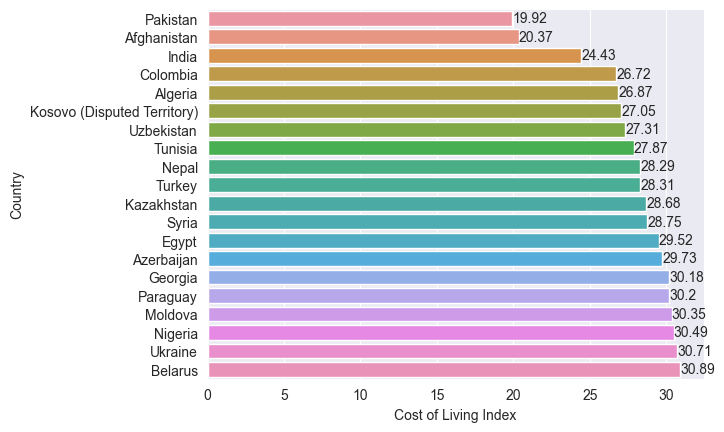

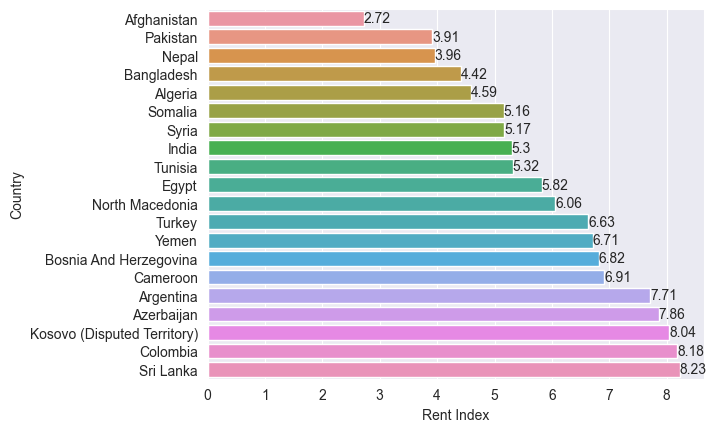

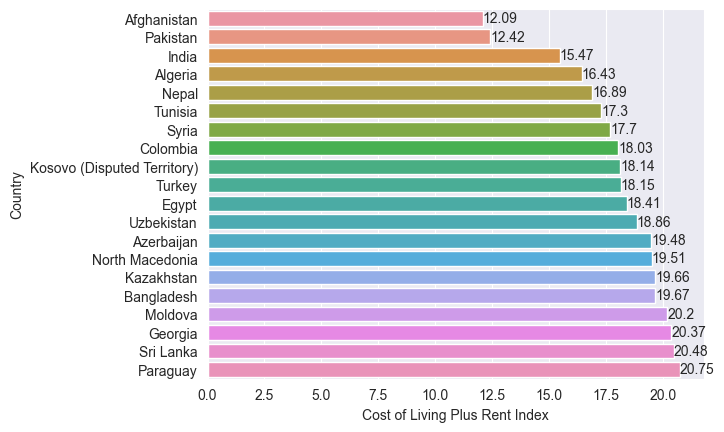

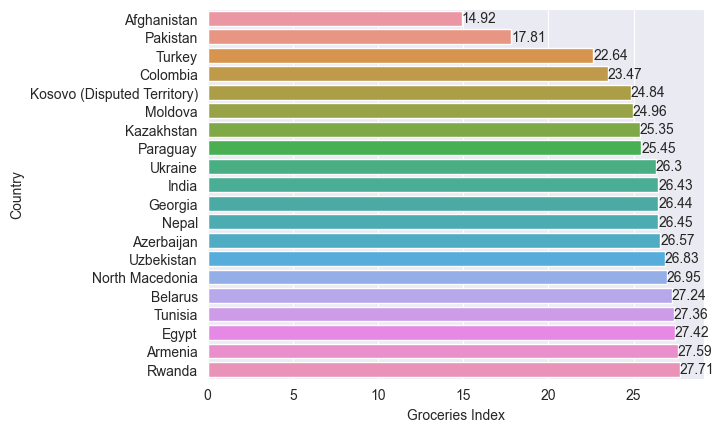

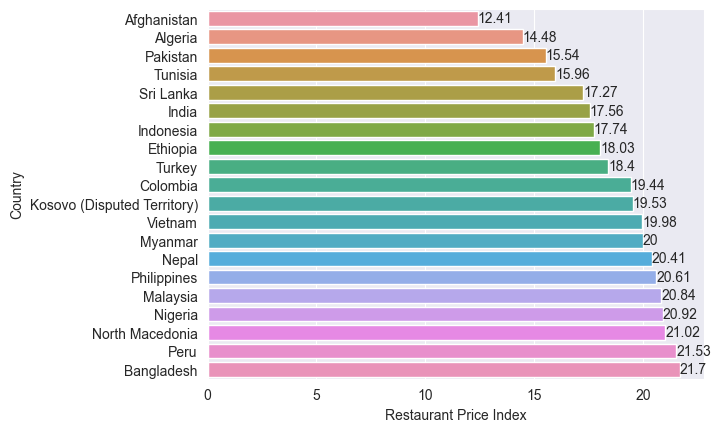

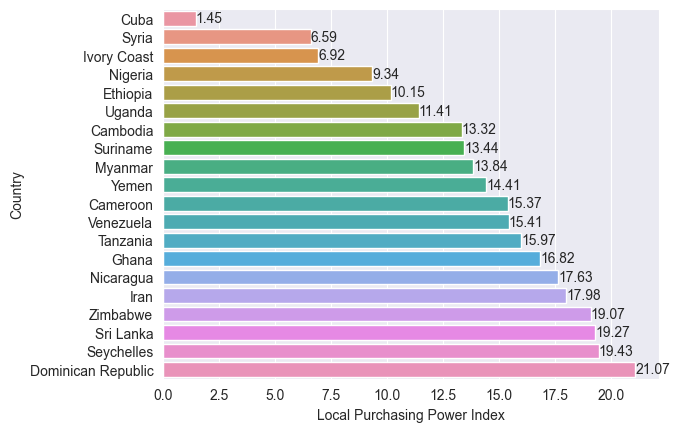

In [26]:
for column in columns:
    top20 = db.nsmallest(20, column)
    ax=sns.barplot(x=db[column], y="Country", data=top20)
    ax.bar_label(ax.containers[0])
    plt.show()


In [27]:
db_regression=db[['Cost of Living Index', 'Rent Index','Cost of Living Plus Rent Index', 'Groceries Index','Restaurant Price Index', 'Local Purchasing Power Index']]

print(db_regression.head())

   Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                 20.37        2.72                           12.09   
1                 35.50        8.47                           22.83   
2                 26.87        4.59                           16.43   
3                 34.69        7.71                           22.04   
4                 33.89       11.61                           23.45   

   Groceries Index  Restaurant Price Index  Local Purchasing Power Index  
0            14.92                   12.41                         23.04  
1            29.32                   25.82                         30.19  
2            28.82                   14.48                         24.63  
3            28.17                   33.32                         30.72  
4            27.59                   30.55                         28.86  


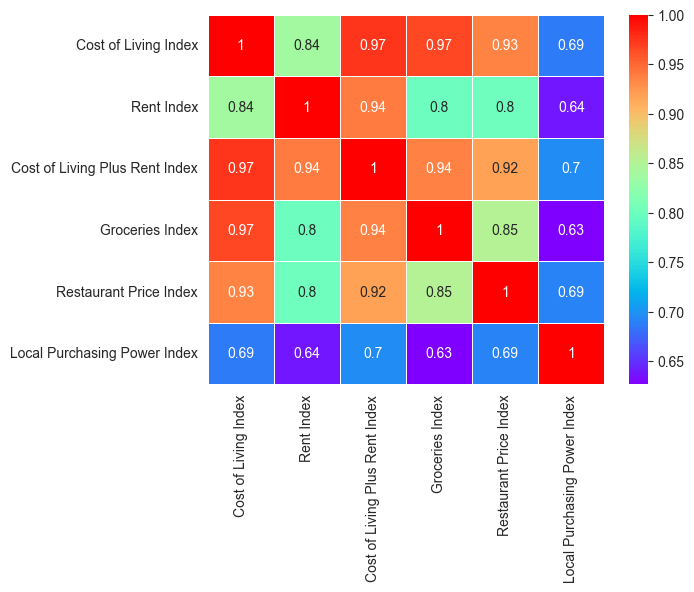

In [32]:
g2=db_regression.corr()
sns.heatmap(data=g2, cmap="rainbow", annot=True, linewidths=.5)

plt.show()

In [34]:
import plotly.express as px

In [49]:
fig1=px.choropleth(db,
              locationmode="country names",
              locations=db.Country,
              color='Cost of Living Index',
              projection='kavrayskiy7',
              scope='world',
              title='Fig.1: Cost of Living Index',
              color_continuous_scale=px.colors.sequential.Sunset)

fig1.show()

In [53]:
colors = px.colors.qualitative.Set2
fig2=px.choropleth(db,
              locationmode="country names",
              locations=db.Country,
              color='Rent Index',
              projection='kavrayskiy7',
              scope='world',
              title='Fig.2: Cost of Rent Index',
              color_continuous_scale=px.colors.sequential.Sunset)

fig2.show()

In [54]:
fig3=px.choropleth(db,
              locationmode="country names",
              locations=db.Country,
              color='Cost of Living Plus Rent Index',
              projection='kavrayskiy7',
              scope='world',
              title='Fig.3: Cost of Living Plus Rent Index',
              color_continuous_scale=px.colors.sequential.Sunset)

fig3.show()

In [55]:
fig4=px.choropleth(db,
              locationmode="country names",
              locations=db.Country,
              color='Groceries Index',
              projection='kavrayskiy7',
              scope='world',
              title='Fig.4: Groceries Index',
              color_continuous_scale=px.colors.sequential.Sunset)

fig4.show()

In [56]:
fig5=px.choropleth(db,
              locationmode="country names",
              locations=db.Country,
              color='Restaurant Price Index',
              projection='kavrayskiy7',
              scope='world',
              title='Fig.5: Restaurant Price Index',
              color_continuous_scale=px.colors.sequential.Sunset)

fig5.show()

In [57]:
fig6=px.choropleth(db,
              locationmode="country names",
              locations=db.Country,
              color='Local Purchasing Power Index',
              projection='kavrayskiy7',
              scope='world',
              title='Fig.6: Local Purchasing Power Index',
              color_continuous_scale=px.colors.sequential.Sunset)

fig6.show()

In [62]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [64]:
x=db_regression.iloc[:,1:]
y=db_regression.iloc[:,0]

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

print('train shape:', x_train.shape)
print('test shape:', x_test.shape)

train shape: (111, 5)
test shape: (28, 5)


In [70]:
xgbmodel=XGBRegressor()

                

In [71]:
xgbmodel.fit(x_train, y_train)

pred=xgbmodel.predict(x_train)

In [73]:
from sklearn import metrics
print("訓練集 R2 score: ", xgbmodel.score(x_train,y_train))
print("測試集 R2 score: ", xgbmodel.score(x_test,y_test))
mse=metrics.mean_squared_error(y_train,pred)
print("MSE score: ", mse)

訓練集 R2 score:  0.9999999971493727
測試集 R2 score:  0.9489042843901256
MSE score:  1.21153388308794e-06


[1.0634507e-02 8.1764883e-01 1.5508887e-01 1.6218577e-02 4.0918228e-04]


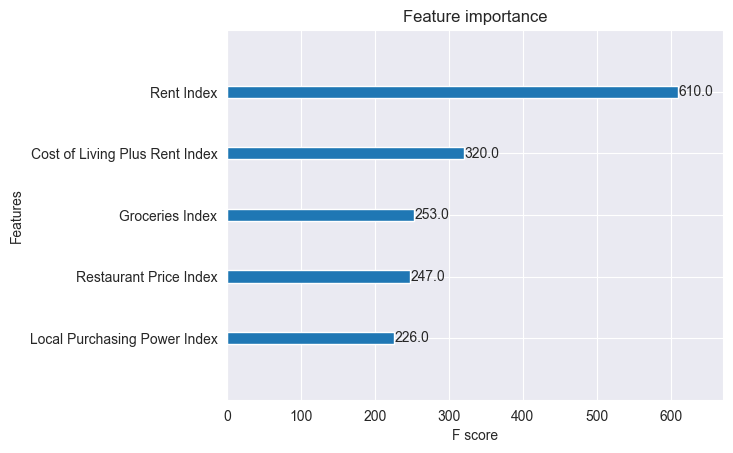

In [74]:
from xgboost import plot_importance

plot_importance(xgbmodel)
print(xgbmodel.feature_importances_)